In [44]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import sys
import glob
sys.path.append('../')
from package_global_functions import *

extSSDpath = getExternalSSDpath()
if os.path.exists(extSSDpath):
    resPath = extSSDpath + getProjectFoldername() + '/gillespie_sim_ci/results'
else:
    resPath = '/results'

In [2]:
pi = 0.0
q = 1.0
l = 1.1
N = 5000
folder = f'sim_results_evos_pis_0.0_0.0_qs_1.0_1.0_l_{l}_lci_0.0_cikw_0_N_5000_ic_p0-60-40'

time_evo = pd.read_csv(folder+'/time_evo_rea_0.csv')

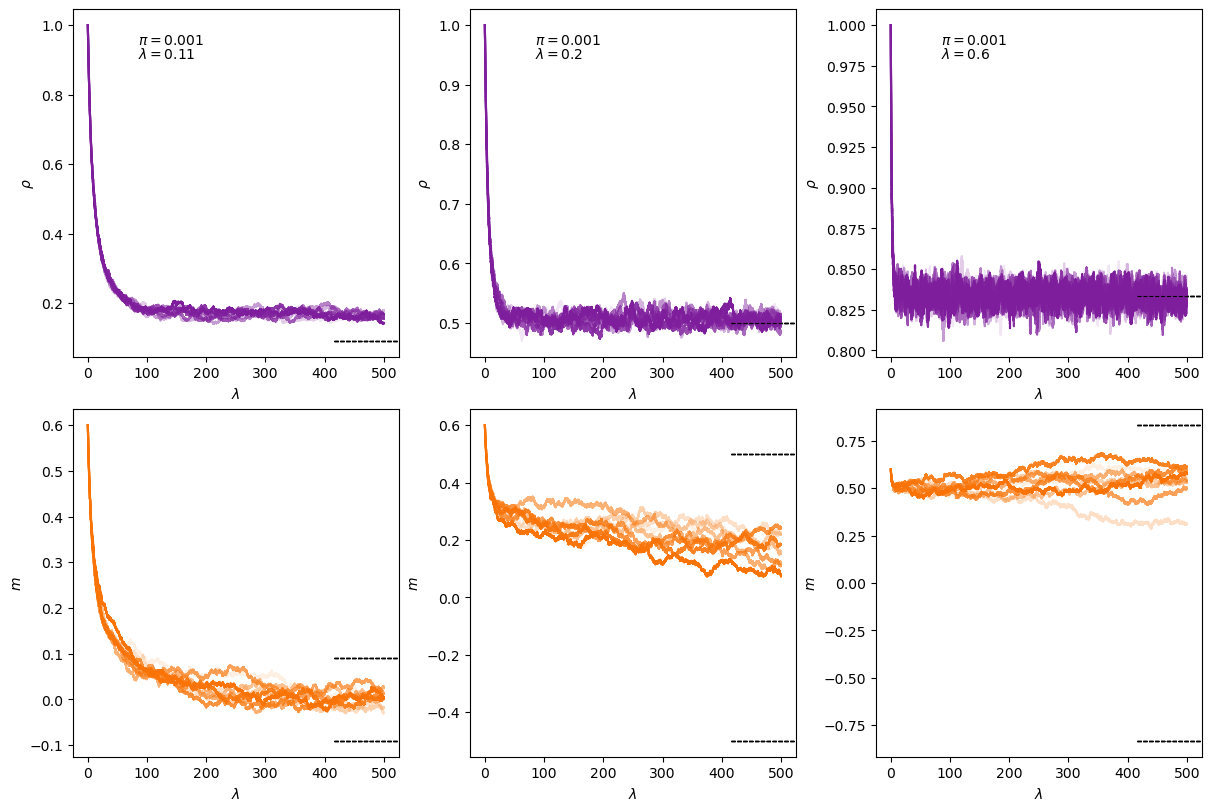

In [38]:
fig, ax = plt.subplots(2,3, figsize=(12,8), constrained_layout=True)
for i in range(3):
    ax[0,i].set(xlabel=r'$\lambda$', ylabel=r'$\rho$')
    ax[1,i].set(xlabel=r'$\lambda$', ylabel=r'$m$')
    
evo_start = 0
pi = 0.001
q = 10.0
ls = [0.11, 0.2, 0.6]
# ic = 'p00-51-49'
ic = 'p00-80-20'

for i,l in enumerate(ls):
# ax.set_xscale('symlog')
    folder = f'sim_results_evos_pis_{pi}_{pi}_qs_{q}_{q}_l_{l}_lci_0.0_cikw_0_N_5000_ic_{ic}'
    ax[0,i].text(0.2,0.9, rf'$\pi = {pi}$', transform=ax[0,i].transAxes)
    ax[0,i].text(0.2,0.86, rf'$\lambda = {l}$', transform=ax[0,i].transAxes)
    for j in range(evo_start,evo_start+10):
        time_evo = pd.read_csv(f'{resPath}/{folder}'+f'/time_evo_rea_{j}.csv')
        time_evo['rho'] = 1 - time_evo['f0']
        time_evo['m'] = time_evo['f1'] - time_evo['f2']
        ax[0,i].plot(time_evo['time'], time_evo['rho'], color='xkcd:purple', alpha=(j-evo_start)/9)
        ax[1,i].plot(time_evo['time'], time_evo['m'], color='xkcd:orange', alpha=(j-evo_start)/9)
        rho = 1-1/(q*l)
        ax[0,i].axhline(rho, 0.8, 1.0, ls='--', color='xkcd:black', lw=0.8)
        ax[1,i].axhline(rho, 0.8, 1.0, ls='--', color='xkcd:black', lw=0.8)
        ax[1,i].axhline(-rho, 0.8, 1.0, ls='--', color='xkcd:black', lw=0.8)

fig.savefig(f'rho_m_dif_lambda_pi_{pi}_q1_{q}_q2_{q}_ic_{ic}.png')

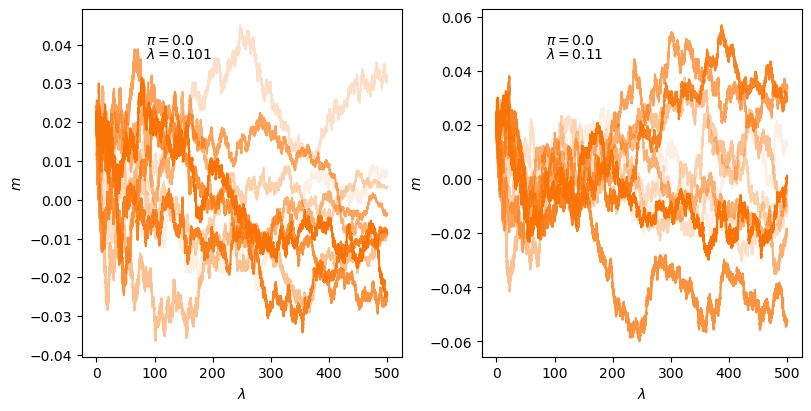

In [42]:
fig, ax = plt.subplots(1,2, figsize=(8,4), constrained_layout=True)

pi = 0.0
q = 10.0
ls = [0.101, 0.11]
for i in range(2):
    ax[i].set(xlabel=r'$\lambda$', ylabel=r'$m$')

ic = 'p00-51-49'

for i,l in enumerate(ls):
    ax[i].text(0.2,0.9, rf'$\pi = {pi}$', transform=ax[i].transAxes)
    ax[i].text(0.2,0.86, rf'$\lambda = {l}$', transform=ax[i].transAxes)
    folder = f'sim_results_evos_pis_{pi}_{pi}_qs_{q}_{q}_l_{l}_lci_0.0_cikw_0_N_5000_ic_{ic}'
    for j in range(evo_start,evo_start+10):
        time_evo = pd.read_csv(f'{resPath}/{folder}'+f'/time_evo_rea_{j}.csv')
        time_evo['m'] = time_evo['f1'] - time_evo['f2']
        ax[i].plot(time_evo['time'], time_evo['m'], color='xkcd:orange', alpha=(j-evo_start)/9)

### with the agent based model

In [ ]:
pi = 0.0
q = 10.0
l = 0.11
p = 'p00-51-49'

resPath_ab = extSSDpath + getProjectFoldername() + f'/evo_to_stationary/time_evos_dif_cond/time_evo_csv_N_{N}_pi1_{pi}_pi2_{pi}_q1_{q}_q2_{q}_l_{l}_ic_{ic}'

files = glob.glob(resPath_ab + '/*')

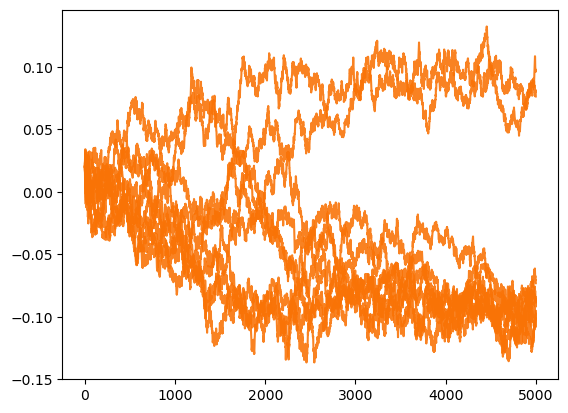

In [61]:
fig, ax = plt.subplots()
evo_start  = 1
for i in range(1,11):
    time_evo = pd.read_csv(resPath_ab + f'/time_evo_rea_{str(i).zfill(3)}.csv')
    time_evo['m'] = time_evo['f1'] - time_evo['f2']
    ax.plot(time_evo['iter'], time_evo['m'], color='xkcd:orange', alpha=(j-evo_start)/9)

# FILE CHEKING BLOCK

In [31]:
# check which files I have
ls = [0.11, 0.2, 0.6]
pi = 0.0
q1, q2 = 10.0, 10.0
ic = 'p00-51-49'
# ic = 'p99-01-00'

for l in ls:
    folder = f'sim_results_evos_pis_{pi}_{pi}_qs_{q1}_{q2}_l_{l}_lci_0.0_cikw_0_N_5000_ic_{ic}'
    if os.path.exists(f'{resPath}/{folder}'):
        print(folder, '   True')
    else:
        print(folder, '   False')

sim_results_evos_pis_0.0_0.0_qs_10.0_10.0_l_0.11_lci_0.0_cikw_0_N_5000_ic_p00-51-49    True
sim_results_evos_pis_0.0_0.0_qs_10.0_10.0_l_0.2_lci_0.0_cikw_0_N_5000_ic_p00-51-49    True
sim_results_evos_pis_0.0_0.0_qs_10.0_10.0_l_0.6_lci_0.0_cikw_0_N_5000_ic_p00-51-49    True
